# SIT225: Data wrangling

Run each cell to generate output and finally convert this notebook to PDF.

In [1]:
# Fill in student ID and name
# 
student_id = "s224734672"
student_first_last_name = "Ankita ankita"
print(student_id, student_first_last_name)

s224734672 Ankita ankita


## Read the Data with Pandas

Pandas has a dedicated function read_csv() to read CSV files.

Just in case we have a large number of data, we can just show into only five rows with head function. It will show you 5 rows data automatically.

In [2]:
import pandas as pd

data_file = "shopping_data.csv"
csv_data = pd.read_csv(data_file)

print(csv_data)

# show into only five rows with head function
print(csv_data.head())

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19   

## Access the Column

Pandas has provided function .columns to access the column of the data source.

In [3]:
print(csv_data.columns)

# if we want to access just one column, for example "Age"
print("Age:")
print(csv_data["Age"])

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Age:
0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64


## Access the Row

In addition to accessing data through columns, using pandas can also access using rows. In contrast to access through columns, the function to display data from a row is the .iloc[i] function where [i] indicates the order of the rows to be displayed where the index starts from 0.

In [4]:
# we want to know what line 5 contains

print(csv_data.iloc[5])

print()

# We can combine both of those function to show row and column we want. 
# For the example, we want to show the value in column "Age" at the first row 
# (remember that the row starts at 0)
# 
print(csv_data["Age"].iloc[1])


CustomerID                     6
Genre                     Female
Age                           22
Annual Income (k$)            17
Spending Score (1-100)        76
Name: 5, dtype: object

21


## Show Data Based on Range

After displaying a data set, what if you want to display data from rows 5 to 20 of a dataset? To anticipate this, pandas can also display data within a certain range, both ranges for rows only, only columns, and ranges for rows and columns

In [5]:
print("Shows data to 5th to less than 10th in a row:")
print(csv_data.iloc[5:10])

Shows data to 5th to less than 10th in a row:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


## Using Numpy to Show the Statistic Information

The describe() function allows to quickly find statistical information from a dataset. Those information such as mean, median, modus, max min, even standard deviation. Don't forget to install Numpy before using describe function.

In [6]:
print(csv_data.describe(include="all"))

        CustomerID   Genre         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.

## Handling Missing Value



In [7]:
# For the first step, we will figure out if there is missing value.
print(csv_data.isnull().values.any())
print()

False



In [8]:
# We will use another data source with missing values to practice this part.
data_missing = pd.read_csv("shopping_data_missingvalue.csv")
print(data_missing.head())

print()

print("Missing? ", data_missing.isnull().values.any())



   CustomerID   Genre   Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.0                15.0                    39.0
1           2    Male   NaN                15.0                    81.0
2           3  Female  20.0                 NaN                     6.0
3           4  Female  23.0                16.0                    77.0
4           5  Female  31.0                17.0                     NaN

Missing?  True


### Ways to deal with missing values. 

Follow the tutorial (https://deepnote.com/app/rickyharyanto14-3390/Data-Wrangling-w-Python-e5d1a23e-33cf-416d-ad27-4c3f7f467442). It includes -
1. Delete data
    * deleting rows
    * pairwise deletion
    * delete column 
2. imputation
    * time series problem
        - Data without trend with seasonality (mean, median, mode, random)
        - Data with trend and without seasonality (linear interpolation)
    * general problem
        - Data categorical (Make NA as multiple imputation)
        - Data numerical or continuous (mean, median, mode, multiple imputation and linear regression)

### Filling with Mean Values

The mean is used for data that has a few outliers/noise/anomalies in the distribution of the data and its contents. This value will later fill in the empty value of the dataset that has a missing value case. To fill in an empty value use the fillna() function

Question: This code will generate error. Can you explain why and how it can be solved? Move on to the next cell to find one way it can be solved.

Answer : print(data_missing.mean())
generates an error because the Genre column contains string values, and .mean() can only be applied to numeric columns.


In [7]:
import pandas as pd

# Genre column contains string values and numerical operation mean fails.
# Let's drop Genre column for numerical calculation.

# Load the data with missing values first
data_missing = pd.read_csv("shopping_data_missingvalue.csv")

data_missing_wo_genre = data_missing.drop(columns=['Genre'])
print(data_missing_wo_genre.mean())



CustomerID                100.500000
Age                        38.939698
Annual Income (k$)         61.005051
Spending Score (1-100)     50.489899
dtype: float64


In [8]:
# Genre column contains string values and numerial operation mean fails. 
# Lets drop Genre column since for numerial calculation.
# 
data_missing_wo_genre = data_missing.drop(columns=['Genre'])
print(data_missing_wo_genre.head())

   CustomerID   Age  Annual Income (k$)  Spending Score (1-100)
0           1  19.0                15.0                    39.0
1           2   NaN                15.0                    81.0
2           3  20.0                 NaN                     6.0
3           4  23.0                16.0                    77.0
4           5  31.0                17.0                     NaN


In [9]:
print(data_missing_wo_genre.mean())

CustomerID                100.500000
Age                        38.939698
Annual Income (k$)         61.005051
Spending Score (1-100)     50.489899
dtype: float64


In [10]:
print("Dataset with empty values! :")
print(data_missing_wo_genre.head(10))

data_filling=data_missing_wo_genre.fillna(data_missing_wo_genre.mean())
print("Dataset that has been processed Handling Missing Values with Mean :")
print(data_filling.head(10))

# Observe the missing value imputation in corresponding rows.
# 

Dataset with empty values! :
   CustomerID   Age  Annual Income (k$)  Spending Score (1-100)
0           1  19.0                15.0                    39.0
1           2   NaN                15.0                    81.0
2           3  20.0                 NaN                     6.0
3           4  23.0                16.0                    77.0
4           5  31.0                17.0                     NaN
5           6  22.0                 NaN                    76.0
6           7  35.0                18.0                     6.0
7           8  23.0                18.0                    94.0
8           9  64.0                19.0                     NaN
9          10  30.0                19.0                    72.0
Dataset that has been processed Handling Missing Values with Mean :
   CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
0           1  19.000000           15.000000               39.000000
1           2  38.939698           15.000000               81

### Filling with Median

The median is used when the data presented has a high outlier. The median was chosen because it is the middle value, which means it is not the result of calculations involving outlier data. In some cases, outlier data is considered disturbing and often considered noisy because it can affect class distribution and interfere with clustering analysis.

In [ ]:
print(data_missing_wo_genre.median())
print("Dataset with empty values! :")
print(data_missing_wo_genre.head(10))

data_filling2=data_missing_wo_genre.fillna(data_missing_wo_genre.median())
print("Dataset that has been processed Handling Missing Values with Median :")
print(data_filling2.head(10))



CustomerID                100.5
Age                        36.0
Annual Income (k$)         62.0
Spending Score (1-100)     50.0
dtype: float64
Dataset with empty values! :
   CustomerID   Age  Annual Income (k$)  Spending Score (1-100)
0           1  19.0                15.0                    39.0
1           2   NaN                15.0                    81.0
2           3  20.0                 NaN                     6.0
3           4  23.0                16.0                    77.0
4           5  31.0                17.0                     NaN
5           6  22.0                 NaN                    76.0
6           7  35.0                18.0                     6.0
7           8  23.0                18.0                    94.0
8           9  64.0                19.0                     NaN
9          10  30.0                19.0                    72.0
Dataset that has been processed Handling Missing Values with Median :
   CustomerID   Age  Annual Income (k$)  Spending Scor

In [17]:
import pandas as pd

# Use full path to the file
df = pd.read_csv(r"C:\Users\Andil\OneDrive\Documents\gyro_data.csv", encoding="utf-8")

print(df.head())  # just to check the first few rows


        Timestamp                            Value      Type
0  6:16:38 am.688  0.45,-33.51,-105.10,-108.15\r\n  received
1  6:16:38 am.778    0.55,-60.30,-49.32,-47.61\r\n  received
2  6:16:38 am.889    0.66,-51.64,-17.15,-37.05\r\n  received
3  6:16:38 am.985     0.76,-23.86,-4.52,-27.10\r\n  received
4   6:16:39 am.97     0.86,-17.09,-6.41,-14.71\r\n  received


First 5 rows of data:
        Timestamp                            Value      Type
0  6:16:38 am.688  0.45,-33.51,-105.10,-108.15\r\n  received
1  6:16:38 am.778    0.55,-60.30,-49.32,-47.61\r\n  received
2  6:16:38 am.889    0.66,-51.64,-17.15,-37.05\r\n  received
3  6:16:38 am.985     0.76,-23.86,-4.52,-27.10\r\n  received
4   6:16:39 am.97     0.86,-17.09,-6.41,-14.71\r\n  received


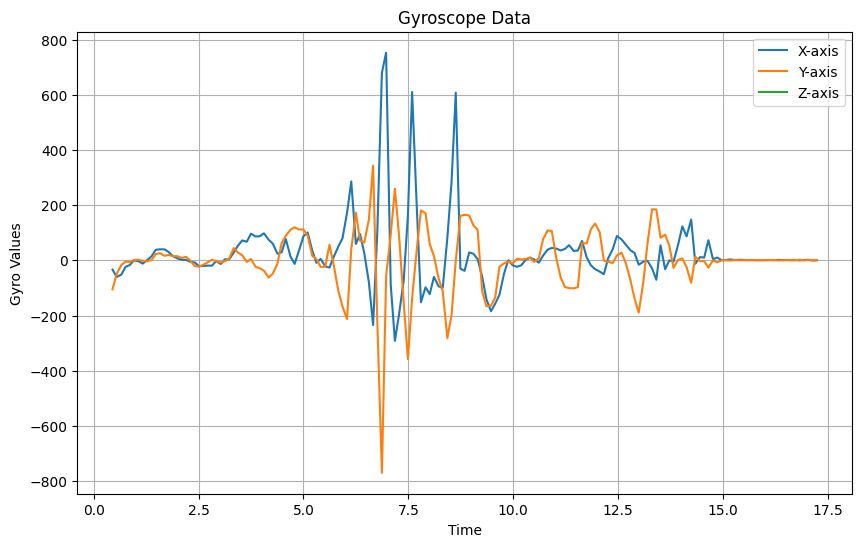

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV using full path
file_path = r"C:\Users\Andil\OneDrive\Documents\gyro_data.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Show first 5 rows
print("First 5 rows of data:")
print(df.head())

# Split the 'Value' column into separate columns
gyro_cols = ['time', 'x', 'y', 'z']
gyro_data = df['Value'].str.replace('\r\n', '').str.split(',', expand=True)
gyro_data.columns = gyro_cols

# Convert columns to numeric
for col in gyro_cols:
	gyro_data[col] = pd.to_numeric(gyro_data[col], errors='coerce')

plt.figure(figsize=(10, 6))
plt.plot(gyro_data['time'], gyro_data['x'], label='X-axis')
plt.plot(gyro_data['time'], gyro_data['y'], label='Y-axis')
plt.plot(gyro_data['time'], gyro_data['z'], label='Z-axis')

plt.title("Gyroscope Data")
plt.xlabel("Time")
plt.ylabel("Gyro Values")
plt.legend()
plt.grid(True)
plt.show()
